In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn import linear_model
 


from sklearn.model_selection import cross_val_score

#Data processing functions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")


In [53]:
df= pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [3]:
df.shape

(50000, 8)

In [54]:
df.head(15)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [55]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [56]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [7]:
df.info

<bound method DataFrame.info of       unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
0       26:21.0     4.5  2009-06-15 17:26:21 UTC           -73.844311   
1       52:16.0    16.9  2010-01-05 16:52:16 UTC           -74.016048   
2       35:00.0     5.7  2011-08-18 00:35:00 UTC           -73.982738   
3       30:42.0     7.7  2012-04-21 04:30:42 UTC           -73.987130   
4       51:00.0     5.3  2010-03-09 07:51:00 UTC           -73.968095   
...         ...     ...                      ...                  ...   
49995   25:15.0    15.0  2013-06-12 23:25:15 UTC           -73.999973   
49996   19:18.0     7.5  2015-06-22 17:19:18 UTC           -73.984756   
49997   53:00.0     6.9  2011-01-30 04:53:00 UTC           -74.002698   
49998   09:00.0     4.5  2012-11-06 07:09:00 UTC           -73.946062   
49999   13:14.0    10.9  2010-01-13 08:13:14 UTC           -73.932603   

       latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0               40.

In [57]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [58]:
df.duplicated().sum()

0

# DATA VISUALISATION

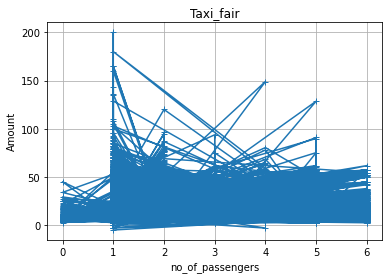

In [59]:
plt.xlabel("no_of_passengers")
plt.ylabel("Amount")
plt.title("Taxi_fair")
plt.grid()
plt.plot(df['no_of_passenger'],df['amount'],marker='+',ms=6)
plt.show()

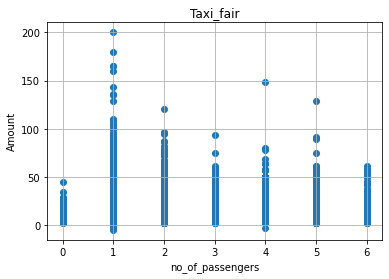

In [60]:
plt.xlabel("no_of_passengers")
plt.ylabel("Amount")
plt.title("Taxi_fair")
plt.scatter(df['no_of_passenger'],df['amount'])
plt.grid()
plt.show()

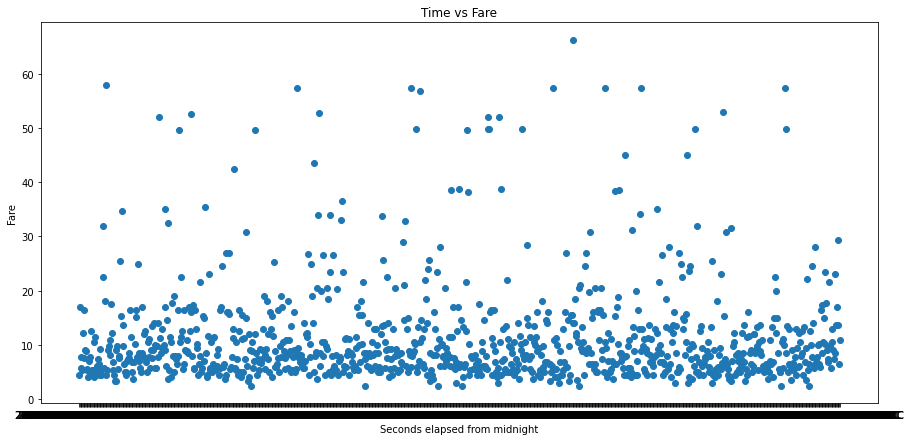

In [12]:
plt.figure(figsize=(15,7))
plt.scatter(df.date_time_of_pickup[0:10**3],df.amount[0:10**3])
plt.title('Time vs Fare')
plt.xlabel('Seconds elapsed from midnight')
plt.ylabel('Fare')
plt.show()

<AxesSubplot:xlabel='amount'>

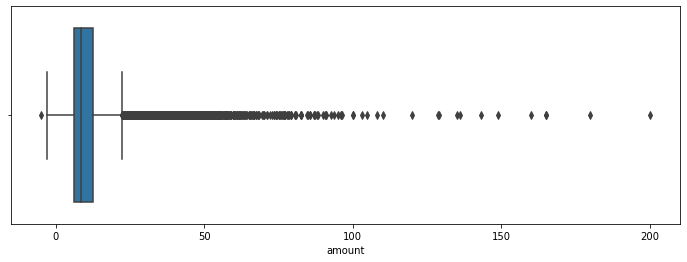

In [61]:

plt.figure(figsize=(12,4))
sns.boxplot(df['amount'])

In [62]:
import datetime
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup']) - datetime.timedelta(hours=4)
df['Year'] = df['date_time_of_pickup'].dt.year
df['Month'] = df['date_time_of_pickup'].dt.month
df['Day'] = df['date_time_of_pickup'].dt.day
df['Hour'] =df['date_time_of_pickup'].dt.hour
df['Minutes'] =df['date_time_of_pickup'].dt.minute
df['Day of Week'] = df['date_time_of_pickup'].dt.dayofweek

In [63]:
df.head(50)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Hour,Minutes,Day of Week
0,26:21.0,4.50,2009-06-15 13:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,13,26,0
1,52:16.0,16.90,2010-01-05 12:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,12,52,1
2,35:00.0,5.70,2011-08-17 20:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,17,20,35,2
3,30:42.0,7.70,2012-04-21 00:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,0,30,5
4,51:00.0,5.30,2010-03-09 03:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,3,51,1
5,50:45.0,12.10,2011-01-06 05:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1,2011,1,6,5,50,3
6,35:00.0,7.50,2012-11-20 16:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1,2012,11,20,16,35,1
7,22:00.0,16.50,2012-01-04 13:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1,2012,1,4,13,22,2
8,10:00.0,9.00,2012-12-03 09:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1,2012,12,3,9,10,0
9,11:00.0,8.90,2009-09-01 21:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2,2009,9,1,21,11,1


# Splitting the dataset into training, validation set before buidling the model

In [64]:
df_input = df[['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff','no_of_passenger','Year','Month','Day','Hour','Minutes','Day of Week']]
df_target = df[['amount']]



X_train, X_val, y_train, y_val = train_test_split(df_input,df_target, test_size=0.02)

In [65]:
X_train

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Hour,Minutes,Day of Week
30236,-73.983634,40.755210,-73.961665,40.768911,1,2012,8,7,18,15,1
25700,-73.970400,40.785792,-73.983107,40.761775,5,2012,3,15,3,0,3
27147,-73.985715,40.745227,-73.992067,40.738352,1,2013,11,20,16,1,2
47078,-73.992165,40.748914,-73.978515,40.762605,1,2013,5,24,10,47,4
21972,-74.000693,40.757992,-73.967083,40.762642,1,2009,5,31,8,38,6
...,...,...,...,...,...,...,...,...,...,...,...
20540,-73.972118,40.791692,-73.975390,40.789857,1,2012,5,2,13,15,2
39579,-73.969575,40.762602,-73.976352,40.735947,1,2014,11,16,13,19,6
4508,-73.994030,40.751162,-73.993177,40.688135,1,2013,2,7,8,43,3
40730,-73.986963,40.761101,-73.994775,40.761006,1,2014,8,28,17,6,3


In [66]:
y_train

,amount
30236,7.30
25700,7.30
27147,4.50
47078,11.50
21972,31.05
...,...
20540,3.70
39579,12.00
4508,31.00
40730,5.50


# LINEAR REGRESSION

In [67]:
reg=linear_model.LinearRegression()

In [68]:
reg.fit(X_val,y_val)

LinearRegression()

In [69]:
reg.predict(X_val)

array([[ 8.84758639],
       [12.65514935],
       [13.19297722],
       [11.8717873 ],
       [ 8.96325649],
       [12.10190046],
       [12.37371779],
       [ 9.18766622],
       [ 9.28438603],
       [10.74823791],
       [12.02435634],
       [ 9.99437674],
       [10.91637117],
       [ 9.50208746],
       [11.15379519],
       [14.16156194],
       [11.6666128 ],
       [10.70238975],
       [12.18019642],
       [12.75963232],
       [11.31251775],
       [ 9.05139472],
       [13.00459717],
       [11.12006392],
       [11.05003603],
       [11.21049361],
       [10.92614217],
       [10.83525579],
       [30.14913774],
       [11.49442324],
       [11.07101154],
       [12.10135566],
       [10.9679887 ],
       [ 9.50132183],
       [ 9.54933823],
       [ 9.08133971],
       [ 8.56360362],
       [11.04579112],
       [ 8.78591302],
       [10.94665773],
       [ 9.53251806],
       [ 9.06725453],
       [13.3693275 ],
       [12.41850536],
       [10.11714075],
       [ 8

In [70]:
np.mean(cross_val_score(reg, X_train, y_train, cv=5))

0.016117985967554028

# DECISION TREE REGRESSION

In [71]:
from sklearn.tree import DecisionTreeRegressor


In [72]:
DT = DecisionTreeRegressor()


In [74]:
R_Squared = np.mean(cross_val_score(DT, X_train, y_train, cv=5))


In [75]:
Standard_deviation = np.std(cross_val_score(DT, X_train, y_train, cv=5))


In [76]:
print('R2 of Decision Tree Regression model is:',R_Squared)
print('Standard deviation of R2 of Decision Tree Regression model is:',Standard_deviation)

R2 of Decision Tree Regression model is: 0.5470198651849978
Standard deviation of R2 of Decision Tree Regression model is: 0.03867123078416445


# RANDOM FOREST REGRESSION

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
rf = RandomForestRegressor()

In [79]:
R_Squared = np.mean(cross_val_score(rf, X_train, y_train, cv=5))

In [45]:
Standard_deviation = np.std(cross_val_score(rf, X_train, y_train, cv=5))

In [46]:
print('R2 of Random Forest Regression model is:',R_Squared)
print('Standard deviation of R2 of Random Forest Regression model is:',Standard_deviation)

R2 of Random Forest Regression model is: 0.7613622071445387
Standard deviation of R2 of Random Forest Regression model is: 0.03333377199153505


# GRADIENT BOOST REGRESSION

In [81]:
from sklearn.ensemble import GradientBoostingRegressor


In [82]:
GB = GradientBoostingRegressor()


In [83]:
np.mean(cross_val_score(GB, X_train, y_train, cv=5))

0.7185574061704039

# Support vector Machine

In [95]:
from sklearn.svm import SVR



In [115]:

svr_reg = SVR()


In [116]:
print('Fitting the model...')
svr_reg.fit(X_train, y_train)



Fitting the model...


SVR()

In [122]:

print('Predicting the model...')
y_pred = svr_reg.predict(X_val)



Predicting the model...


In [123]:
print('Calculating RMSE....')
from sklearn.metrics import mean_squared_error
svr_reg = mean_squared_error(y_val, y_pred, squared=False)

print(f'RMSE = {svr_reg}')



Calculating RMSE....
RMSE = 8.945267388348334


# Bagging Regression

In [135]:
from sklearn.ensemble import BaggingRegressor

In [138]:
bag_regressor=BaggingRegressor(random_state=1)

In [139]:
bag_regressor.fit(X_train,y_train)

BaggingRegressor(random_state=1)

In [146]:
BaggingRegressor(base_estimator=None,bootstrap=True,bootstrap_features=False,
                max_features=1.0,max_samples=1.0,n_estimators=1.0,
                n_jobs=None,oob_score=False,random_state=1,verbose=0,
                warm_start=False)

BaggingRegressor(n_estimators=1.0, random_state=1)

In [149]:
y_pred=bag_regressor.predict(X_val)

In [152]:
print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(X_val, y_val))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_val, y_val))

Training Coefficient of R^2 : 0.765
Test Coefficient of R^2 : 0.765


# Ada Boost Regression

In [159]:
from sklearn.ensemble import AdaBoostRegressor

In [163]:
adaboost_regressor = AdaBoostRegressor(n_estimators=1500, learning_rate = 0.001, loss='exponential')
ada_model = adaboost_regressor.fit(X_train, y_train)
prediction_test_ada = ada_model.predict(X_val)



In [167]:
from sklearn import metrics
print('RMSE', np.sqrt(metrics.mean_squared_error(y_val,prediction_test_ada)))
#Coefficient of determination R^2 of the prediction
print('The model\'s performance is %.2f\n' % ada_model.score(X_val, y_val))

RMSE 6.269711934848514
The model's performance is 0.47

